# Project: Investigate a soccer dataset extracted from *Kaggle* 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion_Q1">Conclusion Q1</a></li>
<li><a href="#conclusion_Q2">Conclusion Q2</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Soccer dataset extracted from Kaggle [web site](https://www.kaggle.com/hugomathien/soccer), The database is stored in a SQLite database with 8 tables that contains players and teams attributes sourced from EA Sports and different sites, +25,000 matches, +10,000 players, 11 European Countries with their lead championship, Seasons 2008 to 2016
        
- Some players are missing from the lineup (NULL values). This is because no source to their attributes from FIFA.
- After quick review using sqlite, i had been interested in players attributes.
- SQL were used to extract data i need and save it to csv file formate.


### Questions :
1- Considering players improvement during their career, what is the most potential age range that they could improve the most?

2- What is the most important attribute that must be exist in the attackers overall rating among the famous skills like dribbling, sprint speed, vision, heading accuracy and shot power ?


In [1]:
# Seting up import statements for all of the packages that we plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

_In this section of the report, loading the data, checking for cleanliness, and then trimming and cleaning the dataset for analysis._ 

### General Properties

In [2]:
# using sqlite to extract Player and Player_Attributes in 1 table, joining them with player_fifa_api_id
# saving the data to Soccer_players.csv

# reading the uploaded csv file
df = pd.read_csv('Soccer_players.csv')

print(df.columns) # print all coulmns names

df.head(3) # display headers

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'id.1', 'player_api_id.1', 'player_name',
       'player_fifa_api_id.1', 'birthday', 'height', 'weight'],
      dtype='object')


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id.1,player_api_id.1,player_name,player_fifa_api_id.1,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [3]:
# since the data are extensive, i need to drop un-needed columns, as i will focus on attackers
# then start to look closely to the datafram

# drop all cloumns except what i need (foucs on attacker's attributes)
# using df.index.difference but for column instead of index to return other columns name that were not givin
df.drop(df.columns.difference(['player_fifa_api_id','date', 'overall_rating', 'attacking_work_rate',
                              'heading_accuracy', 'dribbling', 'shot_power', 'sprint_speed',
                              'vision', 'birthday']), axis=1, inplace = True)
# re-display the header
df.head(3)


,player_fifa_api_id,date,overall_rating,attacking_work_rate,heading_accuracy,dribbling,sprint_speed,shot_power,vision,birthday
0,218353,2016-02-18 00:00:00,67.0,medium,71.0,51.0,64.0,55.0,54.0,1992-02-29 00:00:00
1,218353,2015-11-19 00:00:00,67.0,medium,71.0,51.0,64.0,55.0,54.0,1992-02-29 00:00:00
2,218353,2015-09-21 00:00:00,62.0,medium,71.0,51.0,64.0,55.0,54.0,1992-02-29 00:00:00


In [4]:
# confirm the unique data of attacking_work_rate
# to select the unique value of attackers
print('unique values are: ', df.attacking_work_rate.unique())

unique values are:  ['medium' 'high' nan 'low' 'None' 'le' 'norm' 'stoc' 'y']


In [5]:
# confrim how many rows assigned for high attacking rate
print('count of high attacking rate evaluations: ', df.attacking_work_rate.value_counts().high)

# extract attackers dataframe using query of high attacking rate
# assign query result to attacker_df
attacker_df = df.query('attacking_work_rate == "high"')

count of high attacking rate evaluations:  42823


In [6]:
# check for nulls values and duplicates in attacker_df
print(attacker_df.shape, df.duplicated().sum())

attacker_df.isnull().sum() # print total nulls in each column

(42823, 10) 91


player_fifa_api_id     0
date                   0
overall_rating         0
attacking_work_rate    0
heading_accuracy       0
dribbling              0
sprint_speed           0
shot_power             0
vision                 0
birthday               0
dtype: int64

In [7]:
# check for data types to select which column we need to convert its format
attacker_df.dtypes

player_fifa_api_id       int64
date                    object
overall_rating         float64
attacking_work_rate     object
heading_accuracy       float64
dribbling              float64
sprint_speed           float64
shot_power             float64
vision                 float64
birthday                object
dtype: object

### Data Cleaning

Cleaning steps :
- 91 duplicated row were found and it will not affect the datafram if dropped.
- drop attacking_work_rate column from attacker_df as its single unique value.
- rename evaluation date column & player_fifa_api_id columns to eval_date & id.
- convert evaluation date column and birthday column to datetime formate.
- keep only ids with evalouations more than 10.

In [12]:
# make a copy of attacker datafram to apply all the cleaning
# to avoid any pandas warnings regading changing original data
eval_df = attacker_df.copy()

# since no null values, i will drop duplicats (91) that will not affect my analysis
eval_df.drop_duplicates(inplace = True)

# drop attacking_work_rate column as we no longer need it
eval_df.drop(['attacking_work_rate'],axis =1 , inplace=True)

# rename evaluation date & player_fifa_api_id columns
# 'date' does not describe its purpose and 'player_fifa_api_id' is too long 
eval_df.rename(columns={'date': 'eval_date', 'player_fifa_api_id' :'id'}, inplace=True)

In [13]:
# convert date col in datetime format
eval_df.eval_date = pd.to_datetime(eval_df.eval_date)

# convert birthday col in datetime format
eval_df.birthday = pd.to_datetime(eval_df.birthday)

# extract the birth year from birthday column using Series.dt.year
eval_df['birth_year'] = pd.to_datetime(eval_df.birthday).dt.year

eval_df.head(3) # display data frame

,id,eval_date,overall_rating,heading_accuracy,dribbling,sprint_speed,shot_power,vision,birthday,birth_year
5,189615,2016-04-21,74.0,58.0,73.0,78.0,71.0,66.0,1989-12-15,1989
6,189615,2016-04-07,74.0,58.0,73.0,78.0,71.0,66.0,1989-12-15,1989
7,189615,2016-01-07,73.0,57.0,71.0,78.0,71.0,65.0,1989-12-15,1989


In [14]:
eval_df.dtypes # recheck data types


id                           int64
eval_date           datetime64[ns]
overall_rating             float64
heading_accuracy           float64
dribbling                  float64
sprint_speed               float64
shot_power                 float64
vision                     float64
birthday            datetime64[ns]
birth_year                   int64
dtype: object

In [15]:
# using groupby to group the dataframe by id
# using transform to calucate length of each id (how many evaluations)
# assign the grouped and selected id that has more than 10 evaluation to cleaned_df

cleaned_df = eval_df[eval_df.groupby('id').id.transform(len) > 10]

print('average evaluation count after trimming :', cleaned_df.id.value_counts().mean())


average evaluation count after trimming : 19.3007990868


<a id='eda'></a>
## Exploratory Data Analysis

> Data now is trimmed and cleaned and ready to move on to exploration. 

### Research Question 1 :

**What is the most potential age range that they could improve the most?**

- create age at evaluation column that calculate player's age at each date of their evaluation.
- set range of age as follow (under_23 , between 23_28, above_28) .
- create ranking column that contains players rating according to their overall rating during the evaluation period.
- set ranking as performance (best , better than normal, normal)
- visualize bars chart and single chart that represent ranking of players at each range of age and overall rating.

For the range of age and ranking rate, i will use 'pandas cutting' for once and use 'for loop' as alternative method to avoid repetitive code.

In [16]:
# answering question1
# group the players by id and evaluated dates
q1_df = cleaned_df.groupby(['id', 'eval_date'])['overall_rating', 'eval_date','birthday', 'birth_year'].last()

q1_df.head()

overall_rating  eval_date   birthday  birth_year
id eval_date                                                   
27 2007-02-22            87.0 2007-02-22 1981-11-08        1981
   2007-08-30            86.0 2007-08-30 1981-11-08        1981
   2008-08-30            84.0 2008-08-30 1981-11-08        1981
   2009-02-22            83.0 2009-02-22 1981-11-08        1981
   2009-08-30            83.0 2009-08-30 1981-11-08        1981

In [17]:
# create palyer age at each evaluation date
# substracting date of evaluation from player's birthday
q1_df['age_at_eval'] = q1_df.eval_date - q1_df.birthday

q1_df.head(1) # display the new result

,,overall_rating,eval_date,birthday,birth_year,age_at_eval
id,eval_date,,,,,
27,2007-02-22,87.0,2007-02-22,1981-11-08,1981,9237 days


In [18]:
# once the format is timedelta (with days) we need to converte it into years
# divide number of days by 1 year (365 day) return float results 
# using np.timedelta64(1, 'Y') as 1 year
q1_df['age_at_eval'] = q1_df['age_at_eval'] / np.timedelta64(1, 'Y')

# check age at eval data type
q1_df.age_at_eval.dtypes
q1_df.head(1)

,,overall_rating,eval_date,birthday,birth_year,age_at_eval
id,eval_date,,,,,
27,2007-02-22,87.0,2007-02-22,1981-11-08,1981,25.290047


In [19]:
# create bins & label name to be used in cutting birth year column

# set the in and medium and max values
bins = [q1_df.age_at_eval.min()-1 , 23 , 28 , q1_df.age_at_eval.max()]
labels_list=[ 'under_23' , '23_28' ,'above_28' ] # groups name

# cut age at eval column into 3 mentioned group
q1_df['age_group'] = pd.cut(q1_df['age_at_eval'] , bins , labels = labels_list)


In [20]:
# create column to be used in ranking evalution
q1_df['ranking'] = q1_df['overall_rating']

# useing different method other than pd.cut
# create list with rankng score for each player during his evalutaion with "for" loop
# for every row in index of ranking column, divide the cell by avergae rate of selected id
score_list= [q1_df.overall_rating[(index, row)]/q1_df.overall_rating[index].mean() for index, row in q1_df.ranking.index]

# add the list as rank_score column to datafram using pd.Series with same overall rating index
q1_df['rank_score'] = pd.Series(score_list, index= q1_df.overall_rating.index)

**IMP note: pandas cutting is much faster than 'for loop' in dealing with large dataframe**

In [21]:
# assign rank rate description to score
# score above 1.04 (104%) 'best', under 0.97 (97%) 'normal', else is 'better'
q1_df.loc[q1_df.rank_score > 1.04, 'ranking'] = 'best'
q1_df.loc[q1_df.rank_score < 0.97, 'ranking'] = 'normal'
q1_df.loc[(0.97 <= q1_df.rank_score) & (q1_df.rank_score <= 1.04) , 'ranking'] = 'better'

q1_df.head(7) # check results

overall_rating  eval_date   birthday  birth_year  age_at_eval  \
id eval_date                                                                   
27 2007-02-22            87.0 2007-02-22 1981-11-08        1981    25.290047   
   2007-08-30            86.0 2007-08-30 1981-11-08        1981    25.807511   
   2008-08-30            84.0 2008-08-30 1981-11-08        1981    26.809585   
   2009-02-22            83.0 2009-02-22 1981-11-08        1981    27.291457   
   2009-08-30            83.0 2009-08-30 1981-11-08        1981    27.808921   
   2010-08-30            80.0 2010-08-30 1981-11-08        1981    28.808258   
   2011-02-22            79.0 2011-02-22 1981-11-08        1981    29.290129   

              age_group ranking  rank_score  
id eval_date                                 
27 2007-02-22     23_28    best    1.121375  
   2007-08-30     23_28    best    1.108485  
   2008-08-30     23_28    best    1.082707  
   2009-02-22     23_28    best    1.069817  
   2009-08-30     23_28    best    1.069817  
   2010-08-30  above_28  better    1.031149  
   2011-02-22  above_28  better    1.018260

In [22]:
# drop the extra evaluation date column
# 2 column with the same name (1 as index and other as column)
q1_df.drop(labels = ['eval_date'], axis=1, inplace = True)

# reset the index to normal
q1_df.reset_index(inplace = True)


Text(0,0.5,'count')

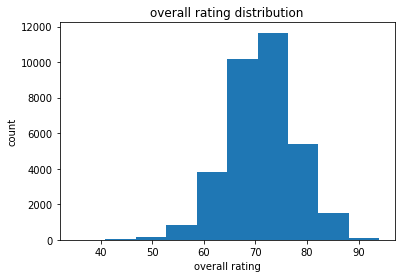

In [23]:
# explore overall rating histogram

plt.hist(q1_df.overall_rating) # selecting data
plt.title('overall rating distribution') # assign title
plt.xlabel('overall rating') # set x label name
plt.ylabel('count') # set y label name

**looking at overall rating histogram, find the distribution is skewed left with highest distribution between 70 and 75**

Average player age at evaluation dates:  25.6302549841


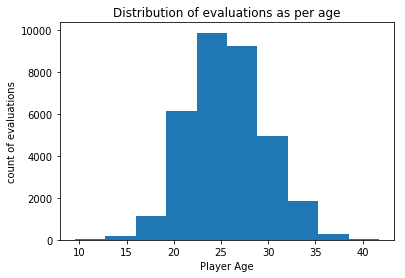

In [24]:
# explore age histogram

plt.hist(q1_df.age_at_eval)
plt.title('Distribution of evaluations as per age')
plt.xlabel('Player Age')
plt.ylabel('count of evaluations')

print('Average player age at evaluation dates: ', q1_df.age_at_eval.mean())

**Almost symmetric distributions, i find that most of the evaluations made for players around age 25**

Text(0,0.5,'count of evaluations')

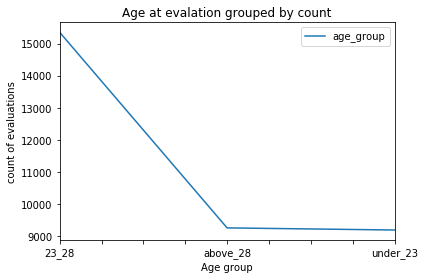

In [25]:
# explore distribution of age_group

# group by data frame by age_group and set values count to be plotted
q1_df.age_group.value_counts().plot(title = 'Age at evalation grouped by count', legend= 'age_group')
plt.xlabel('Age group')
plt.ylabel('count of evaluations')


**age group line plot show clearly the gap of evaluations between age between 23 & 28 and age under 23 or above 28**
- more than 15000 evaluation located between age 23 and 28, while allocated slightly above 9000 for under 23 and above 28 each.

Text(0,0.5,'evaluations')

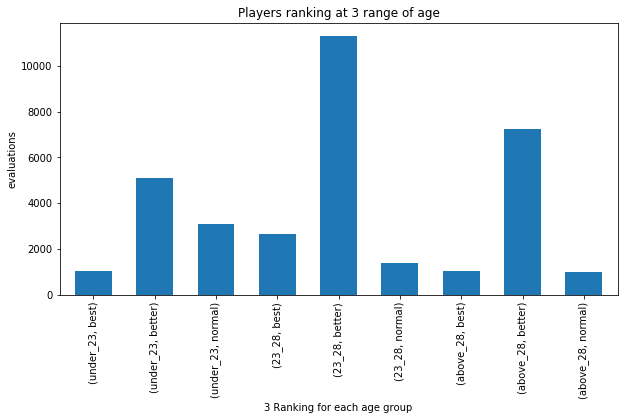

In [26]:
# which age group has the best player's ranking

plt.subplots(figsize = (10 ,5)) # set the layout size

# group both age_group and ranking togather for plotting
q1_df.groupby(['age_group','ranking']).size().plot(kind = 'bar', width = 0.6)
plt.title('Players ranking at 3 range of age')
plt.xlabel('3 Ranking for each age group')
plt.ylabel('evaluations')


### Challenges and limitations thourgh question 1: 

- Data is incomplete as players position were not included and i had been forced to use only high attacking rate players to select the attackers, also count of evaluation varies for each player.
- Using different method other than 'pandas cut' to rank players score into (best, better, normal) was harder than what i expected, it takes long time from me to pass this issue by using 'for loop' because in big dataset it could be very challenging to succeed.

<a id='conclusion_Q1'></a>
## Conclusion Q1

First, its very important to mention that most of the evaluations made for the players at age 25 which is located in range between 23 & 28, which may affect the results regarding the count of evaluations.

Second, I selected attackers for investigation by selected high attacking rate which means that some players are not strikers or forwards which leads that their attributes may be change according to their position.

- Chart has been grouped by age order (under_23 , 23_28, above_28) then ranking performance (best, better, normal)
- Considering my question regarding the best players improvement, it will be at age between 23 & 28, its very clear that 'best' bar at range between 23 & 28 is obvious higher than above 28 & under 23.
- Regarding the players better improvement, also its obvious that players do a better improvement at age between 23 & 28 if its not their best.
- At age under 23 most of the palyers are doing normal or better performance.

Before exploring the data, I thought that the best improvment will be after 28 but it was wrong

### Research Question 2 

**What is the most important attribute that must be exist in the attackers overall rating among the famous skills like dribbling, sprint speed, vision, heading accuracy and shot power ?**

- using dribbling, sprint speed, vision, heading accuracy and shot power columns along with overall rating.
- use describe() to extract our data from each column from min to max.

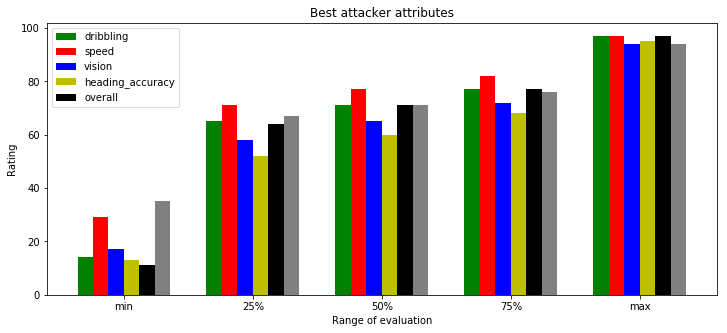

In [27]:
# the most important attribute for the players

# set index, locations, titles
ind = np.arange(5)
plt.subplots(figsize = (12 ,5)) # set the layout size
plt.title('Best attacker attributes')
plt.xlabel('Range of evaluation')
plt.ylabel('Rating')
width = 0.12  # for bar width

# set label name just like the result of describe() min, 25%, 50%, 75%, max
labels = cleaned_df.loc[:, 'overall_rating'].describe()['min':'max'].index
locations = ind + width*5/2 # set location of label names
plt.xticks(locations, labels) # set the location and label on the chart

# set bars data by selecting column of each bar
# and create list from discribe() that shows descriptive statistics at min, 25%, 50%, 75%, max
dribbling = cleaned_df.loc[:, 'dribbling'].describe()['min':'max'].values
speed = cleaned_df.loc[:, 'sprint_speed'].describe()['min':'max'].values
vision = cleaned_df.loc[:, 'vision'].describe()['min':'max'].values
heading = cleaned_df.loc[:, 'heading_accuracy'].describe()['min':'max'].values
shot = cleaned_df.loc[:, 'shot_power'].describe()['min':'max'].values
overall = cleaned_df.loc[:, 'overall_rating'].describe()['min':'max'].values

# create the bars and assign different color to each
plt.bar(ind, dribbling, width, color = 'g')
plt.bar(ind+width, speed, width, color = 'r')
plt.bar(ind+width*2, vision, width,color = 'b')
plt.bar(ind+width*3, heading, width,color = 'y')
plt.bar(ind+width*4, shot, width,color = 'black')
plt.bar(ind+width*5, overall, width ,color = 'grey')

# set legends names
plt.legend(('dribbling', 'speed', 'vision','heading_accuracy','overall'))

**For the selected attributes: sprint speed(red bar) shows the highest rating among other attribute**

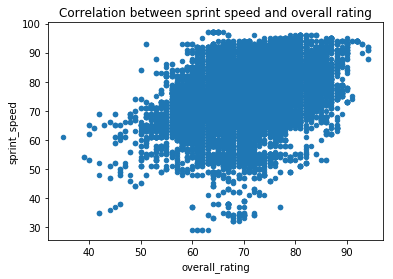

In [28]:
# sactter plot the correlation between sprint speed and overall rating
cleaned_df.plot(x= 'overall_rating' , y= 'sprint_speed' , kind = 'scatter', title = 'Correlation between sprint speed and overall rating')

**Postive correlation between sprint speed and overall rating but shows high overall rate for some players with medium speed rate and vice versa**

Text(0,0.5,'count of evaluations')

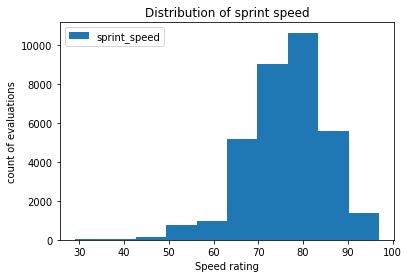

In [29]:
# explore distribution of sprint speed

cleaned_df.sprint_speed.plot(kind= 'hist',title = 'Distribution of sprint speed', legend= 'sprint_speed')
plt.xlabel('Speed rating')
plt.ylabel('count of evaluations')

**Above chart shows the important of sprint speed for attackers, the distribution skewed left with long left tail and highest distribution rate located between 80 and 85**

### Challenges and limitations thourgh question 1: 

- Trying to find most attributes related to strikers takes long time to explore about each of very large list of attributes (as per my opinion)

<a id='conclusion_Q2'></a>
## Conclusion Q2

Only 4 attributes have been selected as the most popular attributes, other attributes related to each one of selected may change the results, such ball control, finishing and volleys amy be realted to dribbling and acceleration, stamina and strength  may related to sprint speed.

- Considering question2, the above bar chart show that the sprint speed is the most common attribute that all attackers need.
- Sprint speed exceeded the overall rating at evaluation except the minimum player's performance.
- At max bars, we can see that most of attributes are close to its others, because its the best player's performance that could reach a 100%.
- Below the max performance, we can see that the heading accuracy is the lowest attribute that players have.


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0